# Text Classification Sentiment Analysis

# Get IDMB Movie review data from <a href="http://ai.stanford.edu/~amaas/data/sentiment/">Here</a>


Importing libraries

In [14]:
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics  import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

converts all  data text file to pandas data frame

In [11]:
folder = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
      
        path = os.path.join('/Users','luo','automation_code',folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
df.columns = ['review', 'sentiment']

In [30]:
df.head(5)

,review,sentiment
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


save the  pandas datframe to movie as csv file 

In [31]:
df.to_csv("movie_data.csv", index=False,encoding="utf-8")

If you got ssl certification error while downloading nltk please comment out below code and run this 

In [32]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [33]:

reviews = df.review.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

198763


['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

Removing stopwords from tokens

In [34]:

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

Word map

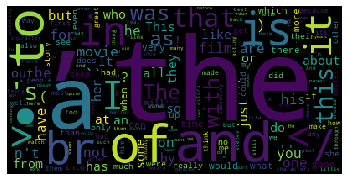

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
# plt.figure(figsize=(100,70))
plt.axis("off")
plt.show()

Train test split

In [ ]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data, test_size=0.1, random_state=5000)

In [ ]:
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values

TfidfTransformer

In [ ]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

# Sklearn MultinomialNB Model 

In [ ]:
clf = MultinomialNB().fit(train_vectors, y_train)

Accuracy

In [ ]:
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

Recall, F1 score, Precision in MultinomialNB

In [ ]:
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1 score:', f1_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))

# SVM

In [50]:
from sklearn.svm import SVC
clf = SVC(gamma='auto').fit(train_vectors, y_train)


In [52]:
predicted = clf.predict(test_vectors)

Recall, F1 score, Precision in SVM

In [53]:
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1 score:', f1_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))

Accuracy: 0.6558
F1 score: 0.7385690414704542
Recall: 0.9724
Precision: 0.5953955424932648


# Pipline

About pipeline: 

Pipeline is just an abstract notion, it's not some existing ml algorithm. Often in ML tasks you need to perform sequence of different transformations (find set of features, generate new features, select only some good features) of raw dataset before applying final estimator.

Here is a good example of Pipeline usage. Pipeline gives you a single interface for all 3 steps of transformation and resulting estimator. It encapsulates transformers and predictors inside, and now you can do something like:

```python 
vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = SGDClassifier()

vX = vect.fit_transform(Xtrain)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)

# Now evaluate all steps on test set
vX = vect.fit_transform(Xtest)
tfidfX = tfidf.fit_transform(vX)
predicted = clf.fit_predict(tfidfX)
```
    
With just:
```python 
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

predicted = pipeline.fit(Xtrain).predict(Xtrain)
```

# Now evaluate all steps on test set
predicted = pipeline.predict(Xtest)
With pipelines you can easily perform a grid-search over set of parameters for each step of this meta-estimator. As described in the link above. All steps except last one must be transforms, last step can be transformer or predictor. Answer to edit: When you call pipln.fit() - each transformer inside pipeline will be fitted on outputs of previous transformer (First transformer is learned on raw dataset). Last estimator may be transformer or predictor, you can call fit_transform() on pipeline only if your last estimator is transformer (that implements fit_transform, or transform and fit methods separately), you can call fit_predict() or predict() on pipeline only if your last estimator is predictor. So you just can't call fit_transform or transform on pipeline, last step of which is predictor.

In [29]:
import pandas as pd
#Now I take the csv file saved previouly in my local directory
df = pd.read_csv('/Users/luo/automation_code/movie_data.csv') 
#here i use my local path  /Users/luo/automation_code/movie_data.csv 
df.head(5)

,review,sentiment
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.1, random_state=5000)

In [22]:
train_body = train_data['review']
train_sentiment = train_data['sentiment']

In [23]:
test_body = train_data['review']
test_sentiment = train_data['sentiment']

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stop_words,
                            analyzer="word", 
                            token_pattern="[\S]*",
                            tokenizer=None,
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss = 'modified_huber', penalty='l2', max_iter=47, random_state=1000)),
                                                                        
])

In [26]:
clf = text_clf_svm.fit(list(train_body), list(train_sentiment))

/Users/luo/tutorial-env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [27]:
predicted = clf.predict(test_body)

In [28]:
print('Accuracy:', accuracy_score(test_sentiment, predicted))
print('F1 score:', f1_score(test_sentiment, predicted))
print('Recall:', recall_score(test_sentiment, predicted))
print('Precision:', precision_score(test_sentiment, predicted))

Accuracy: 0.9052
F1 score: 0.9061881514711705
Recall: 0.916221985058698
Precision: 0.8963717045157922
